# Packages

In [1]:
!pip install langchain
!pip install --quiet langchain_experimental langchain_openai
!pip install sentence-transformers
!pip install --upgrade --quiet langchain-text-splitters tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [2]:
!wget https://huggingface.co/datasets/rewoo/sotu_qa_2023/raw/main/state_of_the_union.txt

--2025-06-06 13:04:49--  https://huggingface.co/datasets/rewoo/sotu_qa_2023/raw/main/state_of_the_union.txt
Resolving huggingface.co (huggingface.co)... 3.168.73.38, 3.168.73.111, 3.168.73.129, ...
Connecting to huggingface.co (huggingface.co)|3.168.73.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42625 (42K) [text/plain]
Saving to: ‘state_of_the_union.txt’

state_of_the_union. 100%[===================>]  41.63K  --.-KB/s    in 0.007s  

2025-06-06 13:04:49 (5.56 MB/s) - ‘state_of_the_union.txt’ saved [42625/42625]



# Chunk split

In [3]:
from langchain.text_splitter import CharacterTextSplitter
import matplotlib.pyplot as plt
from langchain_experimental.text_splitter import SemanticChunker
from langchain_community.embeddings import HuggingFaceEmbeddings

In [12]:
with open(("state_of_the_union.txt")) as f:
  text = f.read()

text_splitter = CharacterTextSplitter(
    separator = "\n\n",
    chunk_size = 350,
    chunk_overlap = 50,
    length_function = len,
    is_separator_regex= False)

docs = text_splitter.create_documents([text])

In [18]:
print(docs[3].page_content)

And I want to give special recognition to someone who I think will be considered the greatest Speaker in the history of this country, Nancy Pelosi.

The story of America is a story of progress and resilience. Of always moving forward. Of never giving up.

A story that is unique among all nations.


In [19]:
len(docs)

150

In [20]:
for i, item in enumerate(docs):
  print(f"Chund N_{i} → {len(item.page_content)}")

Chund N_0 → 332
Chund N_1 → 336
Chund N_2 → 203
Chund N_3 → 297
Chund N_4 → 210
Chund N_5 → 335
Chund N_6 → 191
Chund N_7 → 297
Chund N_8 → 280
Chund N_9 → 222
Chund N_10 → 240
Chund N_11 → 341
Chund N_12 → 341
Chund N_13 → 286
Chund N_14 → 200
Chund N_15 → 347
Chund N_16 → 329
Chund N_17 → 334
Chund N_18 → 297
Chund N_19 → 218
Chund N_20 → 243
Chund N_21 → 304
Chund N_22 → 323
Chund N_23 → 350
Chund N_24 → 269
Chund N_25 → 300
Chund N_26 → 175
Chund N_27 → 295
Chund N_28 → 319
Chund N_29 → 282
Chund N_30 → 186
Chund N_31 → 305
Chund N_32 → 310
Chund N_33 → 292
Chund N_34 → 304
Chund N_35 → 327
Chund N_36 → 245
Chund N_37 → 262
Chund N_38 → 190
Chund N_39 → 266
Chund N_40 → 300
Chund N_41 → 333
Chund N_42 → 274
Chund N_43 → 330
Chund N_44 → 246
Chund N_45 → 255
Chund N_46 → 349
Chund N_47 → 277
Chund N_48 → 299
Chund N_49 → 325
Chund N_50 → 322
Chund N_51 → 336
Chund N_52 → 296
Chund N_53 → 322
Chund N_54 → 305
Chund N_55 → 342
Chund N_56 → 309
Chund N_57 → 336
Chund N_58 → 323
Chund N

<BarContainer object of 150 artists>

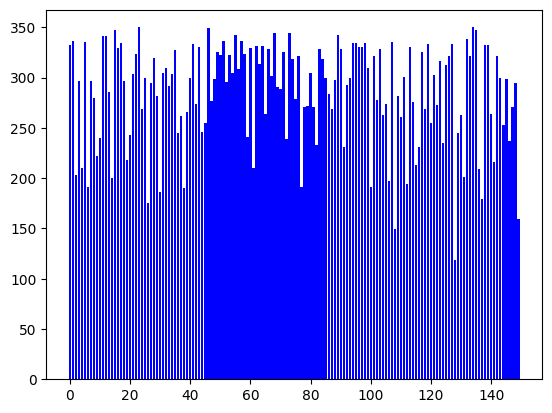

In [22]:
Y = [len(y.page_content) for y in docs]
plt.bar(range(len(docs)), Y, color = "b")

#Semantic Chunk

In [23]:
hf_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2",
                                      model_kwargs={'device': 'cpu'},
                                      encode_kwargs={'normalize_embeddings': False})
text_splitter = SemanticChunker(hf_embeddings)
docs = text_splitter.create_documents([text])

<ipython-input-23-8cf425f1cff5>:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  hf_embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2",
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
len(docs)

30

In [26]:
docs[1].page_content

'That sense of self-worth. I ran for President to fundamentally change things, to make sure the economy works for everyone so we can all feel pride in what we do. To build an economy from the bottom up and the middle out, not from the top down. Because when the middle class does well, the poor have a ladder up and the wealthy still do very well. We all do well.'

In [27]:
for i, item in enumerate(docs):
    print(f"Chunk N°{i} -> {len(item.page_content)}")

Chunk N°0 -> 3523
Chunk N°1 -> 362
Chunk N°2 -> 90
Chunk N°3 -> 2910
Chunk N°4 -> 934
Chunk N°5 -> 490
Chunk N°6 -> 2406
Chunk N°7 -> 50
Chunk N°8 -> 4116
Chunk N°9 -> 229
Chunk N°10 -> 63
Chunk N°11 -> 2679
Chunk N°12 -> 13
Chunk N°13 -> 548
Chunk N°14 -> 1827
Chunk N°15 -> 4171
Chunk N°16 -> 57
Chunk N°17 -> 1814
Chunk N°18 -> 329
Chunk N°19 -> 1556
Chunk N°20 -> 78
Chunk N°21 -> 2905
Chunk N°22 -> 315
Chunk N°23 -> 3242
Chunk N°24 -> 199
Chunk N°25 -> 2422
Chunk N°26 -> 2884
Chunk N°27 -> 525
Chunk N°28 -> 959
Chunk N°29 -> 27


# Token Chunk

In [30]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size = 1000,
    chunk_overlap = 100)

docs = text_splitter.split_text(text)

<BarContainer object of 11 artists>

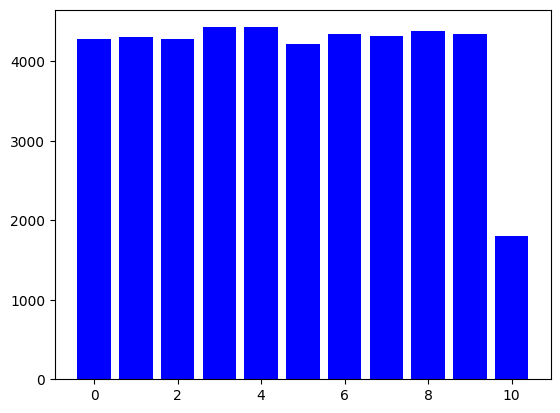

In [37]:
Y = [len(y) for y in docs]
plt.bar(range(len(docs)), Y, color = "b")